##Importamos el dataset##

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/IsaParejaGil/training-data/main/training.csv'
df = pd.read_csv(url)
df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


Exploramos el tamaño del dataset

In [39]:
df.shape

(72983, 34)

## Exploración de los datos numéricos ##

In [40]:
numeric_values = df._get_numeric_data().describe().T

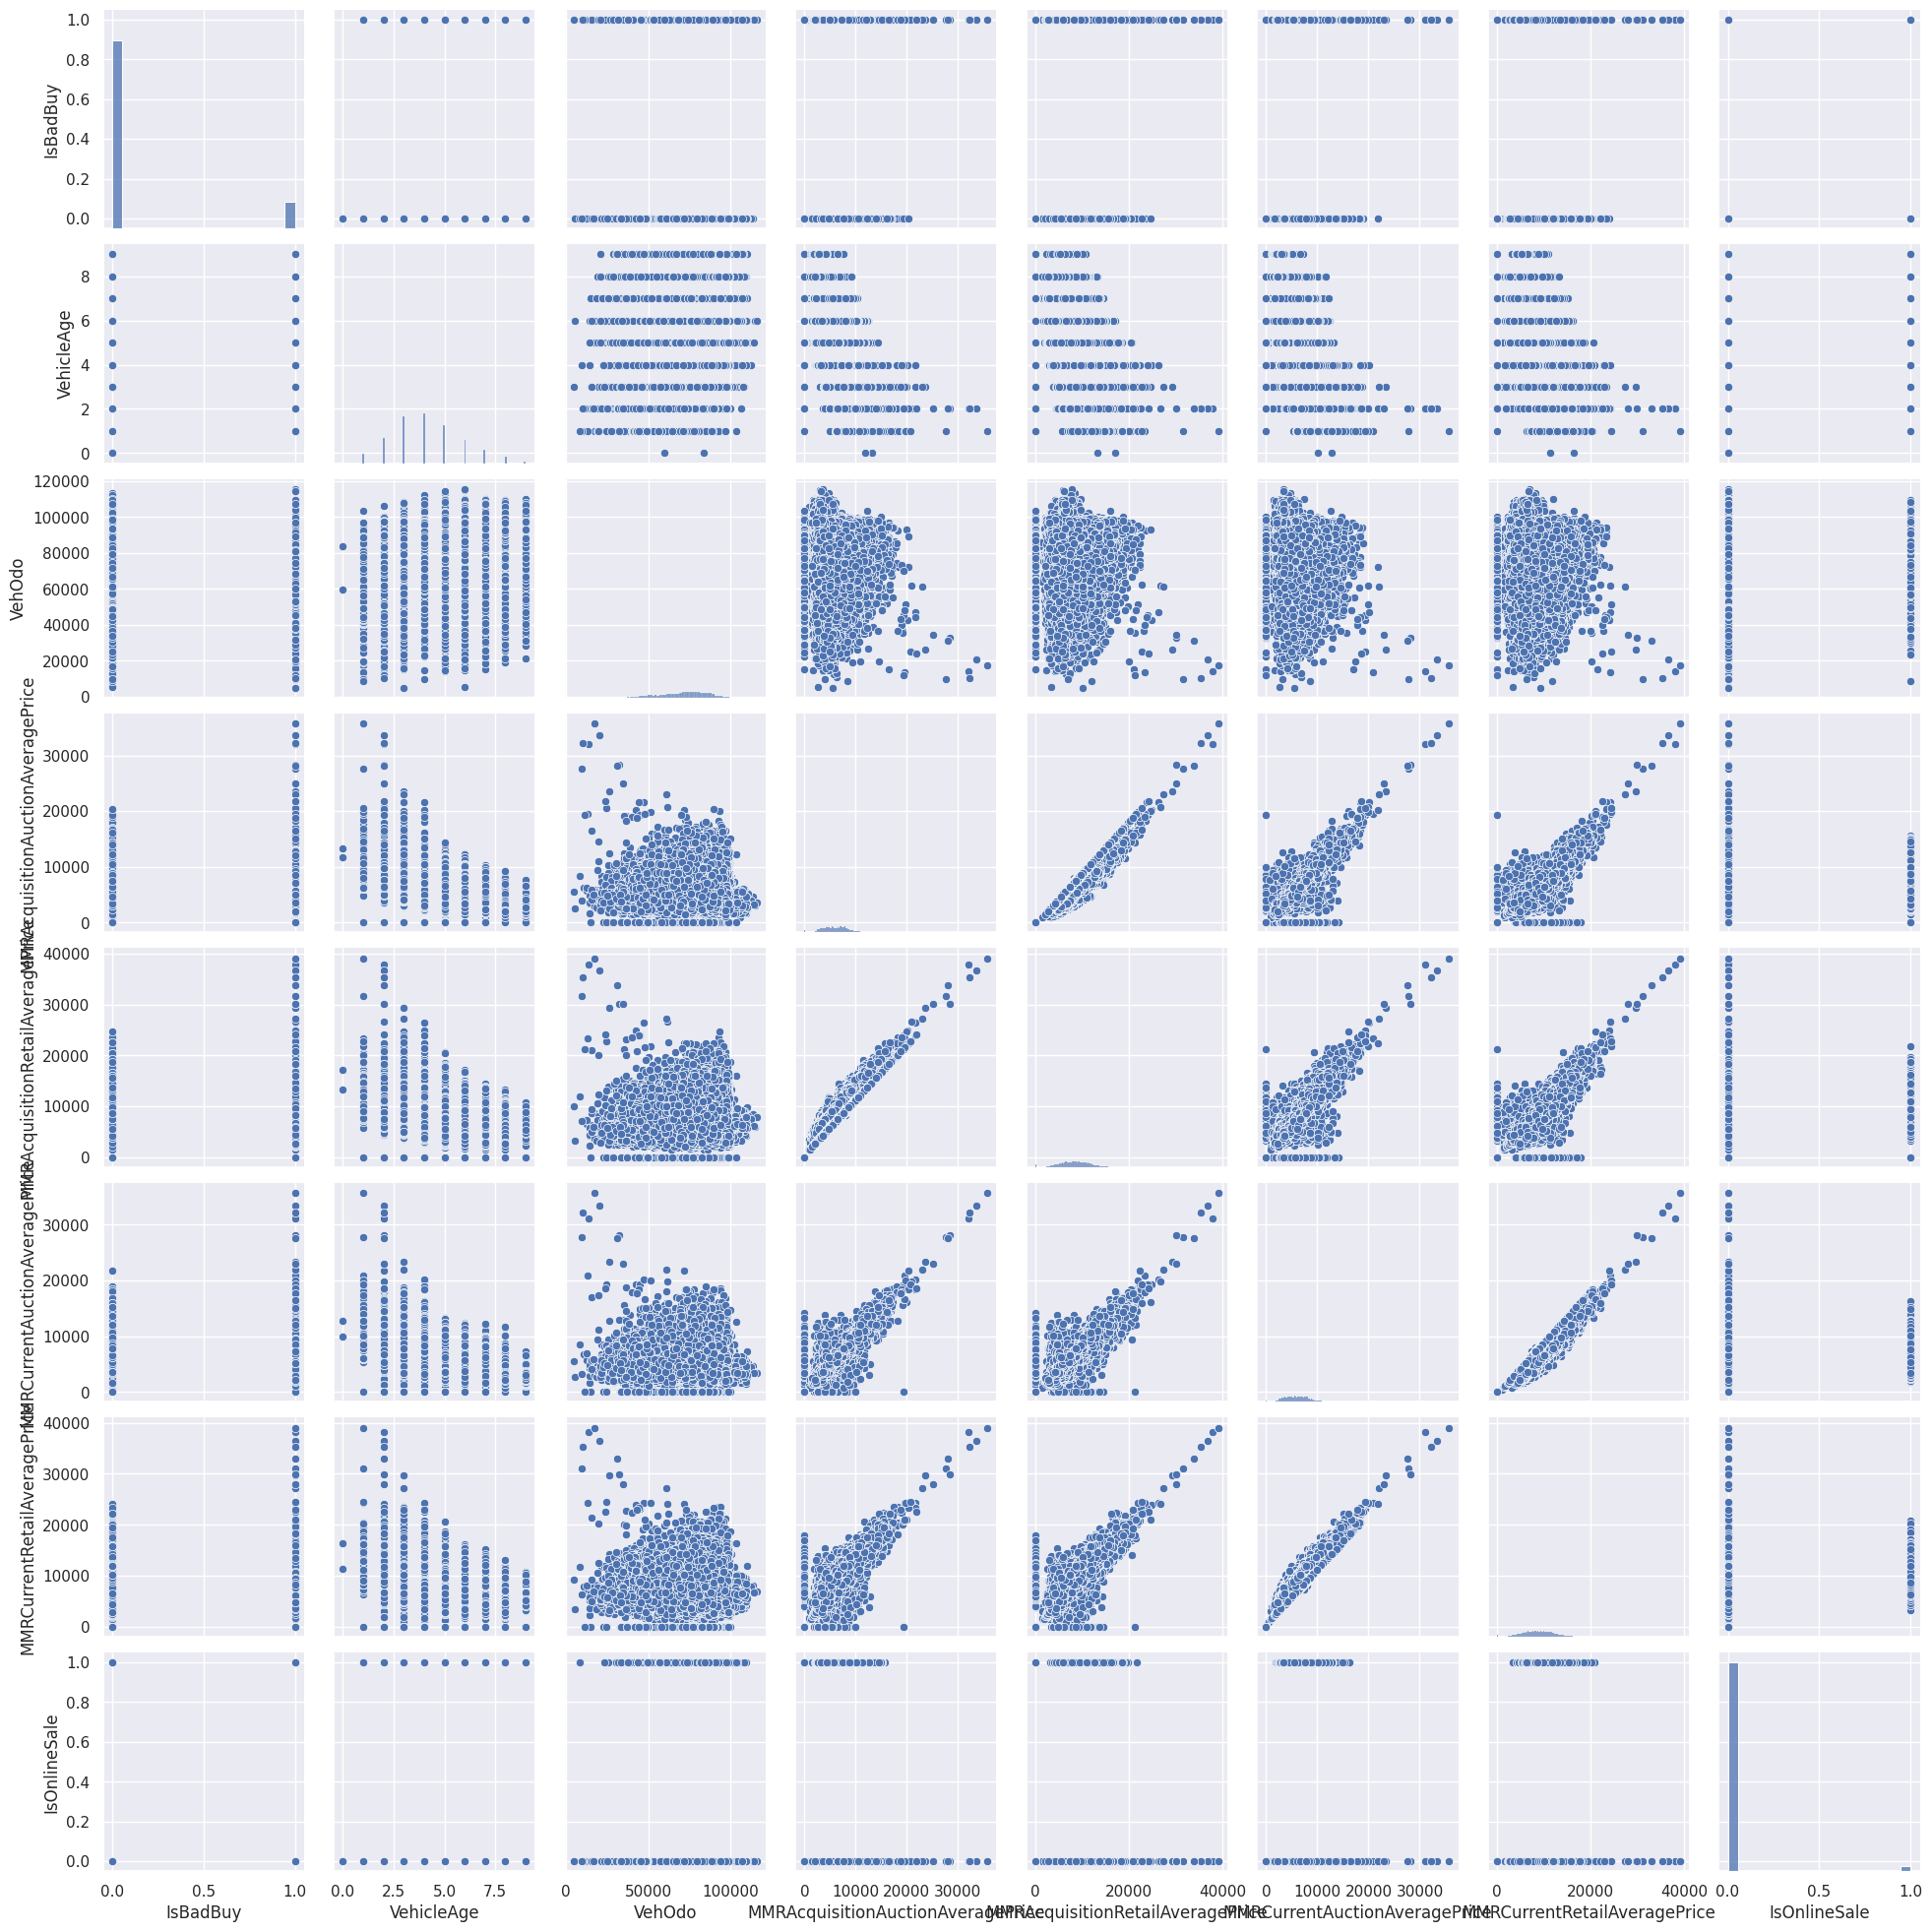

In [41]:
cols = ['IsBadBuy','VehicleAge','VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice','IsOnlineSale']
sns.set()
sns.pairplot(df[cols])


<ipython-input-42-7c54d59844ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


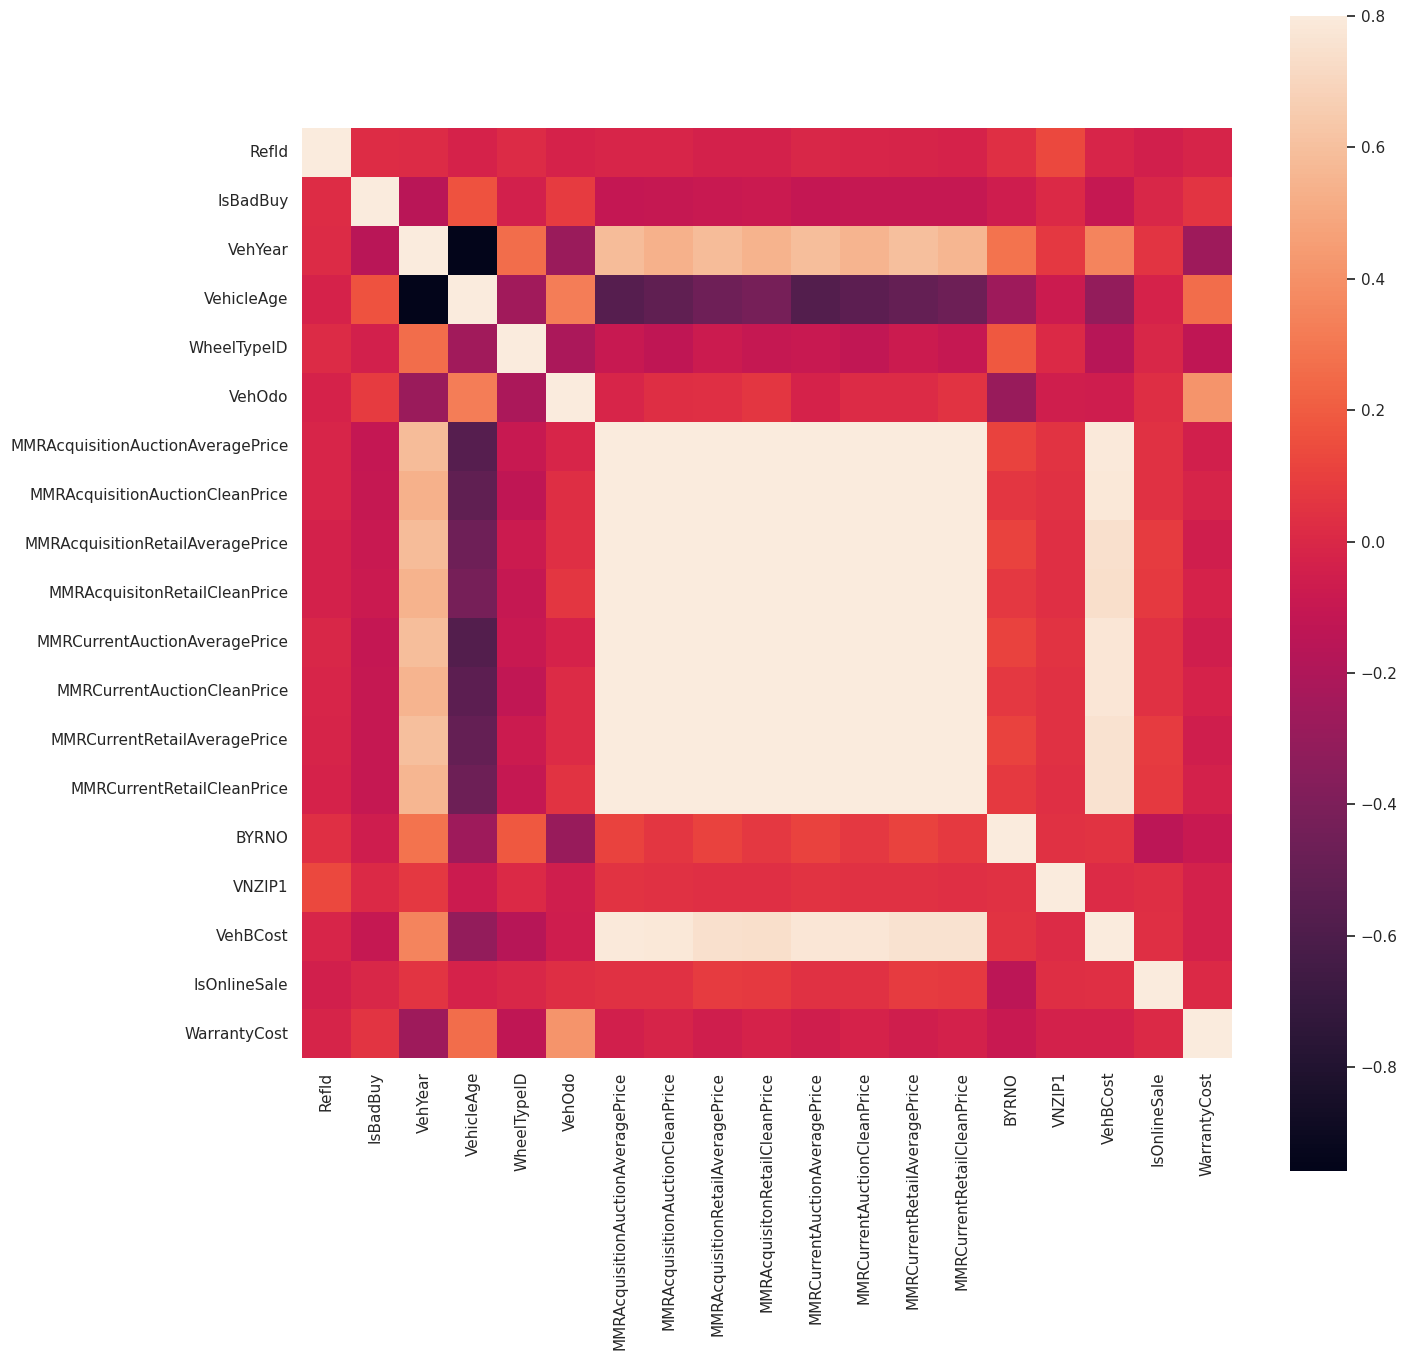

In [42]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

## Exploración datos categóricos ##

In [43]:
ccols = [i for i in df.columns if not i in df._get_numeric_data()]
print (ccols)

['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']


In [44]:
for c in ccols:
    print ("%10s"%c, np.unique(df[c].dropna()))

 PurchDate ['1/10/2010' '1/11/2010' '1/12/2009' '1/12/2010' '1/13/2009' '1/13/2010'
 '1/14/2009' '1/14/2010' '1/15/2009' '1/15/2010' '1/16/2009' '1/18/2010'
 '1/19/2009' '1/19/2010' '1/20/2009' '1/20/2010' '1/21/2009' '1/21/2010'
 '1/22/2009' '1/22/2010' '1/23/2009' '1/25/2010' '1/26/2009' '1/26/2010'
 '1/27/2009' '1/27/2010' '1/28/2009' '1/28/2010' '1/29/2009' '1/29/2010'
 '1/30/2009' '1/4/2010' '1/5/2009' '1/5/2010' '1/6/2009' '1/6/2010'
 '1/7/2009' '1/7/2010' '1/8/2009' '1/8/2010' '1/9/2009' '10/1/2009'
 '10/1/2010' '10/11/2010' '10/12/2009' '10/12/2010' '10/13/2009'
 '10/13/2010' '10/14/2009' '10/14/2010' '10/15/2009' '10/15/2010'
 '10/16/2009' '10/18/2010' '10/19/2009' '10/19/2010' '10/2/2009'
 '10/20/2009' '10/20/2010' '10/21/2009' '10/21/2010' '10/22/2009'
 '10/22/2010' '10/23/2009' '10/25/2010' '10/26/2009' '10/26/2010'
 '10/27/2009' '10/27/2010' '10/28/2009' '10/28/2010' '10/29/2009'
 '10/29/2010' '10/30/2009' '10/4/2010' '10/5/2009' '10/5/2010' '10/6/2009'
 '10/6/2010' '10/7/

In [45]:
estado='VNST'
df[estado].value_counts()

TX    13596
FL    10447
CA     7095
NC     7042
AZ     6174
CO     4998
SC     4280
OK     3594
GA     2450
TN     1764
VA     1662
MD     1158
UT      875
PA      847
OH      795
MO      758
AL      690
NV      562
IA      499
MS      493
IN      486
IL      458
LA      349
NJ      317
WV      292
NM      239
KY      230
OR      211
ID      196
WA      136
NH       97
AR       70
MN       62
NE       26
MA       15
MI       14
NY        6
Name: VNST, dtype: int64

In [46]:
tamaño = 'Size'
df[tamaño].value_counts()

MEDIUM         30785
LARGE           8850
MEDIUM SUV      8090
COMPACT         7205
VAN             5854
LARGE TRUCK     3170
SMALL SUV       2276
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUCK      864
SPORTS           777
Name: Size, dtype: int64

In [47]:
nacionalidad = 'Nationality'
df[nacionalidad].value_counts()

AMERICAN          61028
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64

In [48]:
fabricante = 'Make'
df[fabricante].value_counts()

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
VOLKSWAGEN        134
ISUZU             134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
CADILLAC           33
ACURA              33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64

<ipython-input-49-40c6d781fcfd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.IsBadBuy[k[c]==v], label=v);
<ipython-input-49-40c6d781fcfd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.IsBadBuy[k[c]==v], label=v);
<ipython-input-49-40c6d781fcfd>:6: UserWarning: 

`distplot` is a deprec

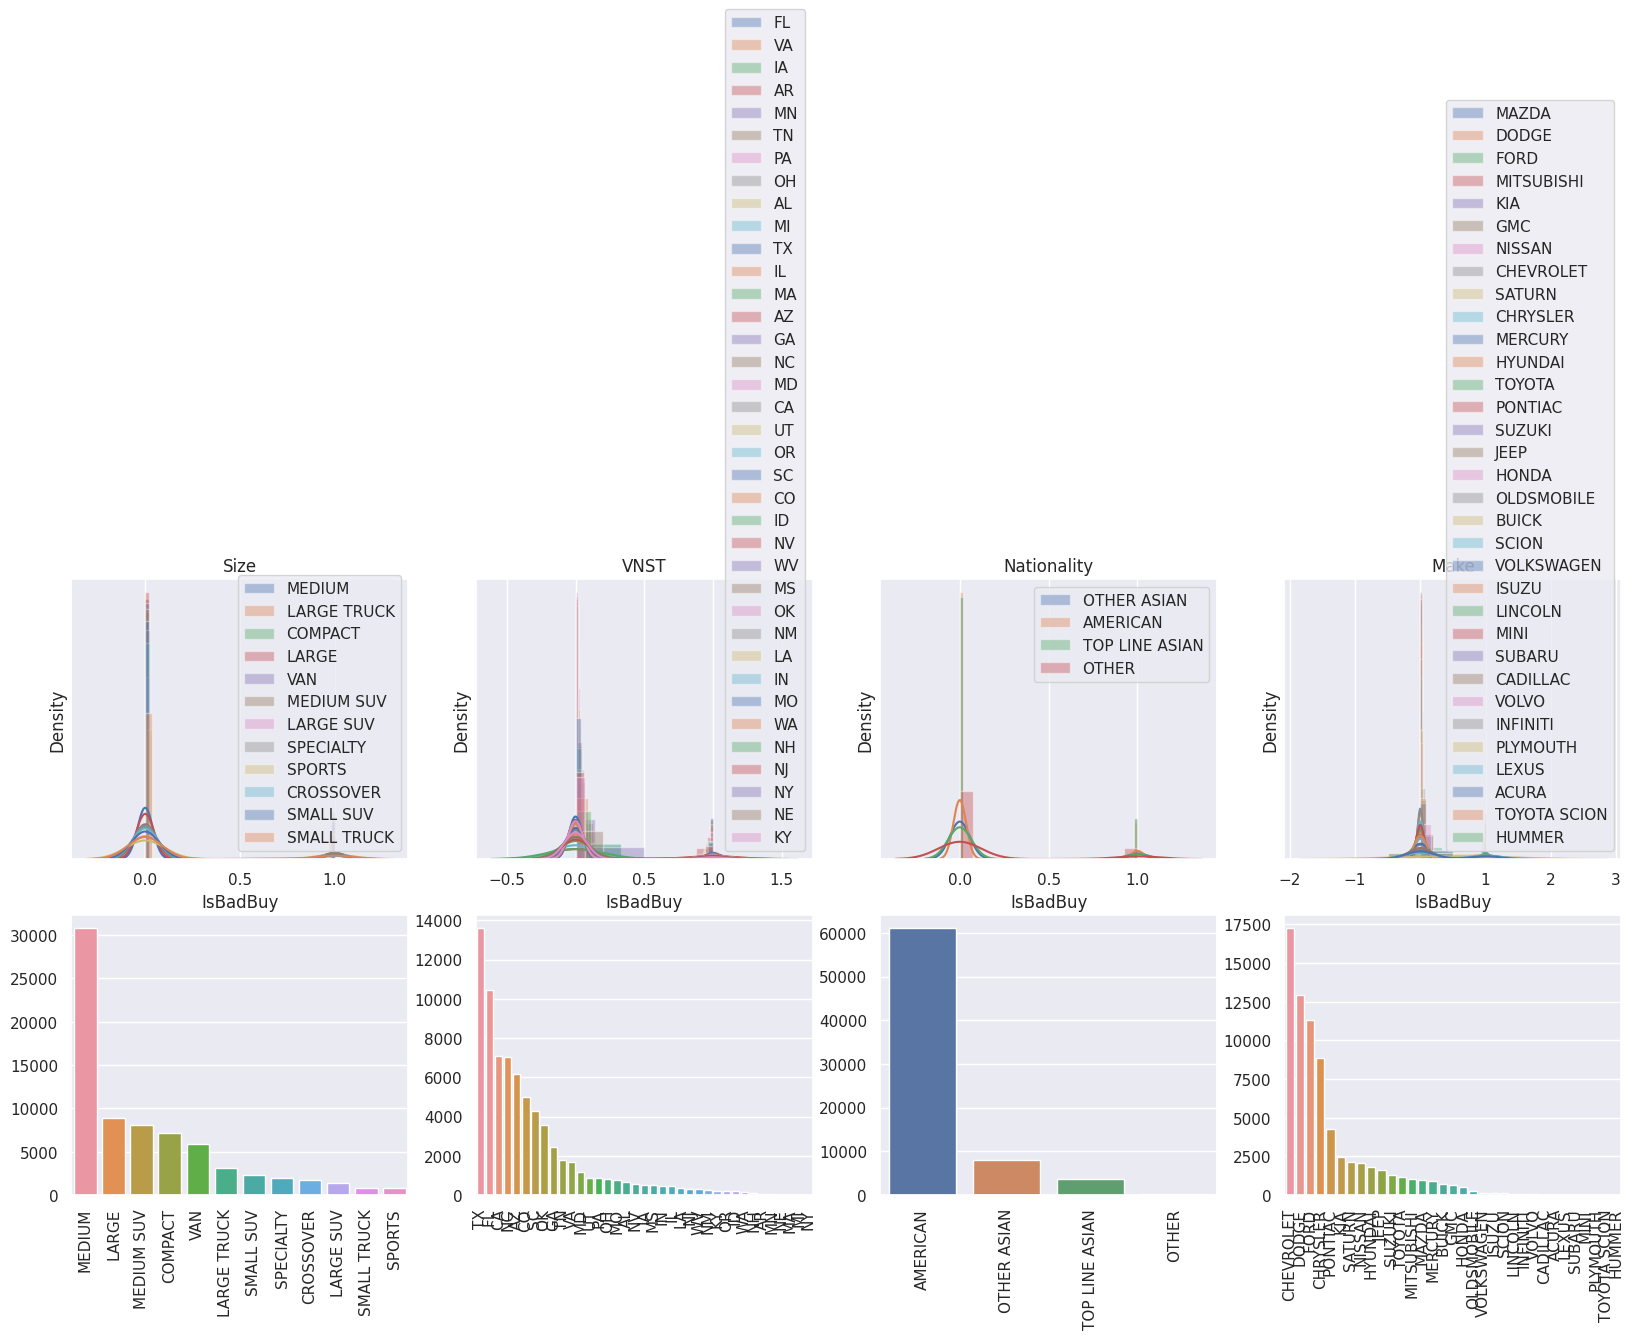

In [49]:
plt.figure(figsize=(20,8))
for i,c in enumerate(["Size", "VNST", "Nationality", "Make"]):    
    plt.subplot(2,4,i+1)
    k=df[[c,"IsBadBuy"]].dropna()
    for v in df[c].dropna().unique():
        sns.distplot(k.IsBadBuy[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)   
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

Visión de los datos faltantes

In [50]:
k = df.isna().sum()
k[k!=0]

Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
dtype: int64

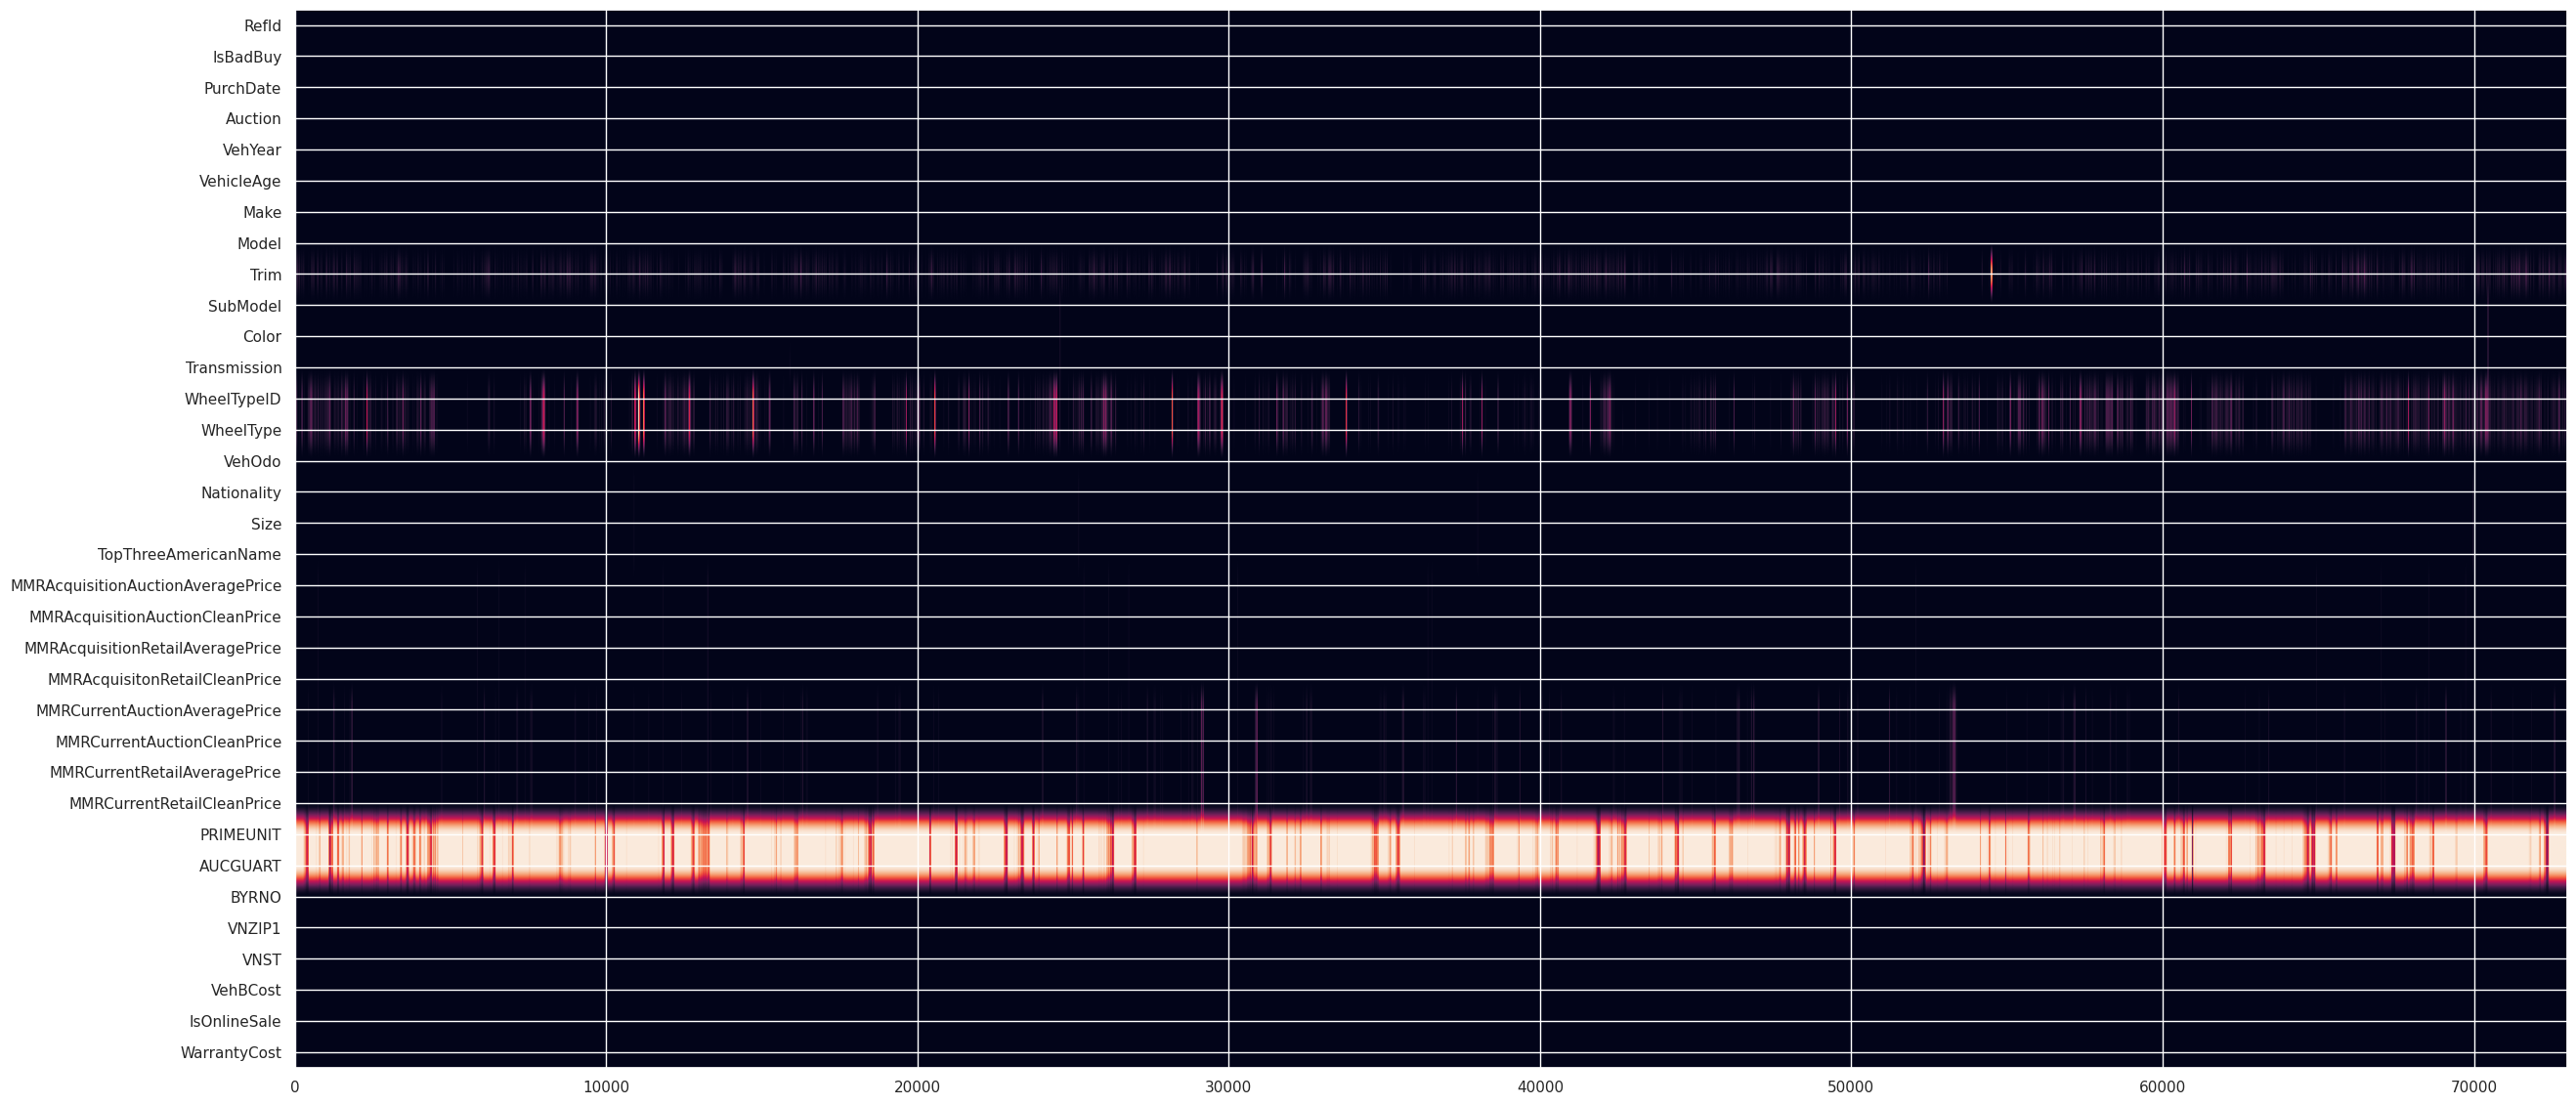

In [51]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(df.isna().values.T)
ax.set_aspect(1000)
plt.yticks(range(df.shape[1]), df.columns);

## Variable objetivo ##

Inspeccionamos la variable objetivo 

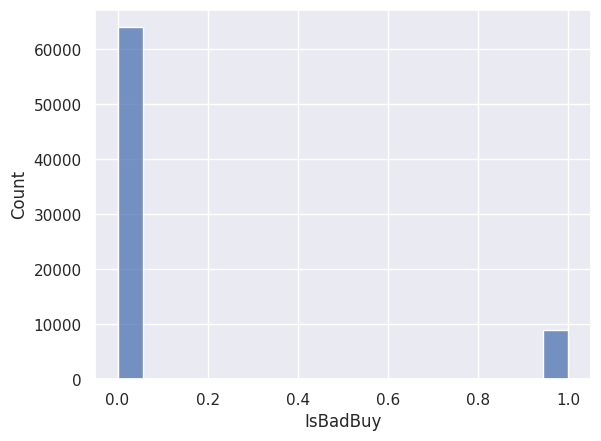

In [52]:
sns.histplot(df['IsBadBuy']);

## Exploración de columnas con valores nulos ##

Observamos las columnas que tengan valores faltantes

In [53]:
k = df.isna().sum()
k[k!=0]

Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
dtype: int64